## Данные

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('004_human_set_3000.csv')
data.head()

,word,defs
0,абажур,верхняя часть лампы
1,абажур,часть лампы
2,абонемент,"это карточка, которая позволяет тебе ходить в ..."
3,абрикос,маленький оранжевый фрукт
4,абрикос,фрукт


In [3]:
data.shape

(2895, 2)

In [4]:
formal_data = pd.read_csv('test_set_002.csv', delimiter=',')

print(formal_data.shape)
formal_data.head()

(26861, 3)


,defs,word,len
0,колпак на лампе,абажур,15
1,настоятель католического монастыря,аббат,34
2,католический священник,аббат,22
3,католический монастырь,аббатство,22
4,слово из первых букв,аббревиатура,20


## Добавим новые признаки

In [5]:
import spacy

nlp = spacy.load('ru_core_news_lg')

In [6]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stops = stopwords.words("russian")

In [7]:
def add_new_features(data):

    lengths = []
    verbs = []
    nouns = []
    adj = []
    prons = []
    punct = []
    len_of_words = []
    
    for i, row in data.iterrows():
        lengths.append(len(row['defs'].split()))
    data['len'] = lengths

    for text in data['defs']:
        puncts = ''.join(x for x in text if x in punctuation)
        punct.append(len(puncts))
        
        text = ''.join(x for x in text if x not in punctuation)
        words = word_tokenize(text, language="russian")
        
        curr_sum = 0
        for word in words:
            curr_sum += len(word)
        if len(words):
            len_of_words.append(curr_sum / len(words))
        else:
            len_of_words.append(0)
        
        words = [word for word in words if word not in stops]
        text = ' '.join(words)
        doc = nlp(text)
        curr_verbs, curr_nouns, curr_adj, curr_prons = 0, 0, 0, 0
        for token in doc:
            if token.pos_ == "VERB":
                curr_verbs += 1
            if token.pos_ == "NOUN":
                curr_nouns += 1
            if token.pos_ == "ADJ":
                curr_adj += 1
            if token.pos_ == "PRON":
                curr_prons += 1
        verbs.append(curr_verbs)
        nouns.append(curr_nouns)
        adj.append(curr_adj)
        prons.append(curr_prons)
        
    data['verbs'] = verbs
    data['nouns'] = nouns
    data['adj'] = adj
    data['prons'] = prons
    data['punct'] = punct
    data['mean_word_len'] = len_of_words
    

In [8]:
add_new_features(data)
add_new_features(formal_data)

data.head()

,word,defs,len,verbs,nouns,adj,prons,punct,mean_word_len
0,абажур,верхняя часть лампы,3,0,2,1,0,0,5.666667
1,абажур,часть лампы,2,0,2,0,0,0,5.000000
2,абонемент,"это карточка, которая позволяет тебе ходить в ...",15,3,3,0,3,1,4.666667
3,абрикос,маленький оранжевый фрукт,3,0,1,2,0,0,7.666667
4,абрикос,фрукт,1,0,1,0,0,0,5.000000


In [9]:
formal_data.head()

,defs,word,len,verbs,nouns,adj,prons,punct,mean_word_len
0,колпак на лампе,абажур,3,0,2,0,0,0,4.333333
1,настоятель католического монастыря,аббат,3,0,2,1,0,0,10.666667
2,католический священник,аббат,2,0,1,1,0,0,10.500000
3,католический монастырь,аббатство,2,0,1,1,0,0,10.500000
4,слово из первых букв,аббревиатура,4,0,2,1,0,0,4.250000


In [10]:
data.to_csv('human_set_3000_with_features.csv')
formal_data.to_csv('formal_set_with_features.csv')

## Гистограммы распределения

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D5D93E80>]],
      dtype=object)

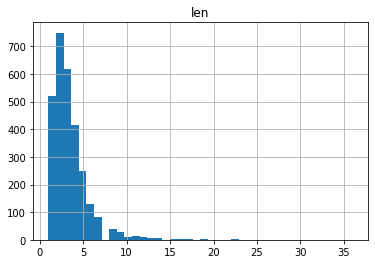

In [12]:
data.hist(column='len', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D5E422B0>]],
      dtype=object)

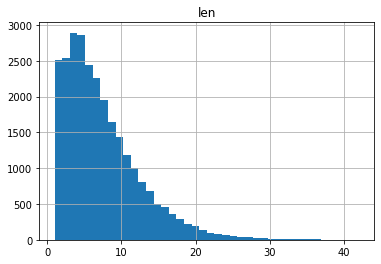

In [13]:
formal_data.hist(column='len', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D5DDA278>]],
      dtype=object)

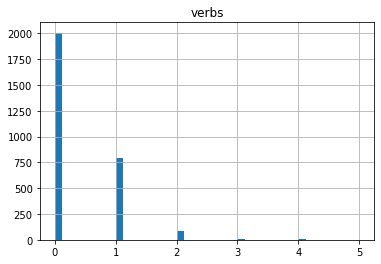

In [14]:
data.hist(column='verbs', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D5FD9DD8>]],
      dtype=object)

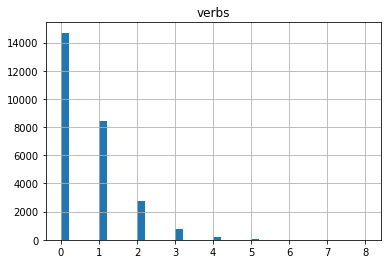

In [15]:
formal_data.hist(column='verbs', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D62936D8>]],
      dtype=object)

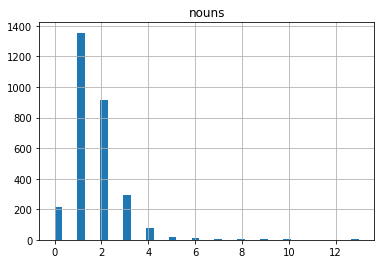

In [16]:
data.hist(column='nouns', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D6337048>]],
      dtype=object)

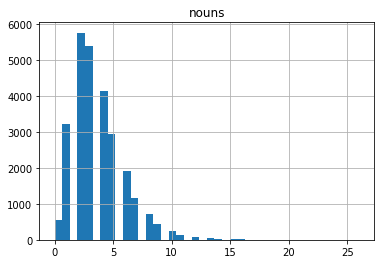

In [17]:
formal_data.hist(column='nouns', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D642E358>]],
      dtype=object)

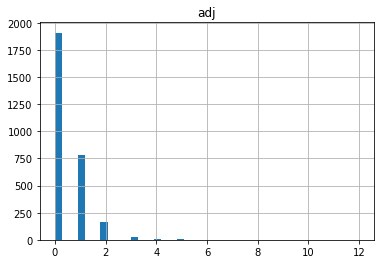

In [18]:
data.hist(column='adj', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D64F0358>]],
      dtype=object)

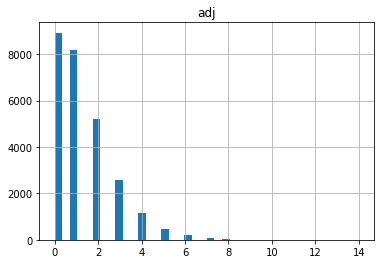

In [19]:
formal_data.hist(column='adj', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D65DFE80>]],
      dtype=object)

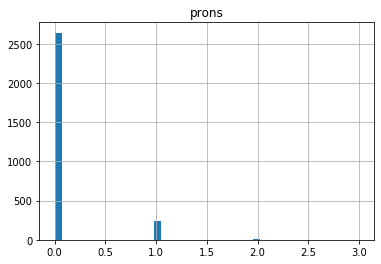

In [20]:
data.hist(column='prons', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D66A8160>]],
      dtype=object)

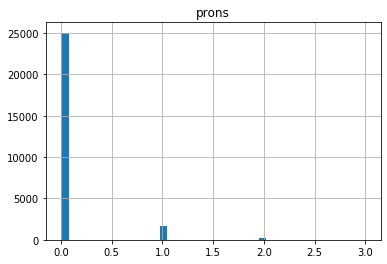

In [22]:
formal_data.hist(column='prons', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D68E7198>]],
      dtype=object)

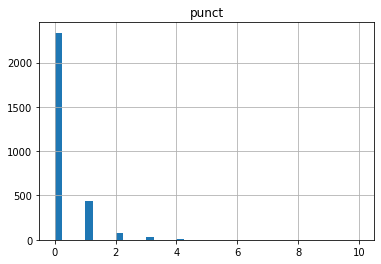

In [23]:
data.hist(column='punct', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D69C56A0>]],
      dtype=object)

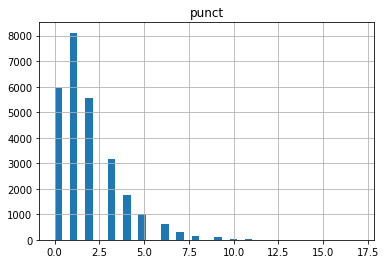

In [24]:
formal_data.hist(column='punct', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D6A77E48>]],
      dtype=object)

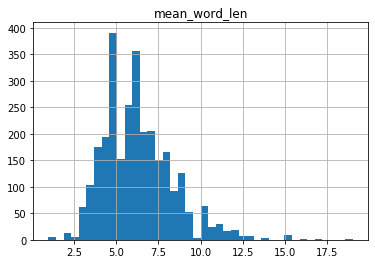

In [25]:
data.hist(column='mean_word_len', bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3D699D550>]],
      dtype=object)

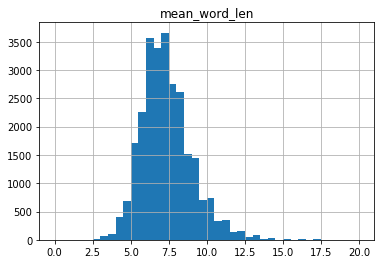

In [26]:
formal_data.hist(column='mean_word_len', bins=40)

Итого (для человеческих определений): в основном, определения не длинные -- до 10 слов. В них встречаются существительные (довольно часто), много определений, где нет ни глаголов, ни прилагательных. Средняя длина слова в определениях около 7 букв.

Для формальных другие закономерности: они более длинные количеству слов -- до 20 слов, средняя длина слова примерно такая же. В них больше существительных, глаголов, прилагательных и знаков пунктуации.

Местоимения встречаются не часто (в основном, не более одного в определении).

## Boxplots

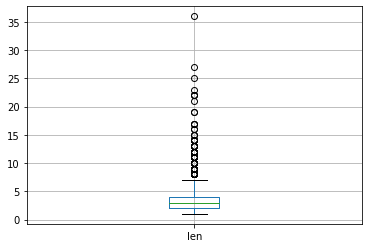

In [27]:
data.boxplot(column='len')

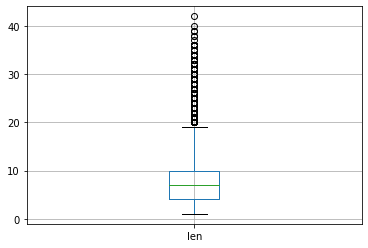

In [28]:
formal_data.boxplot(column='len')

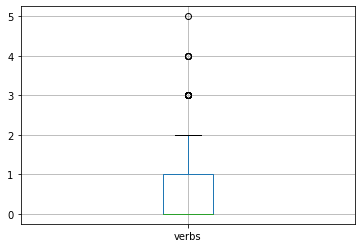

In [29]:
data.boxplot(column='verbs')

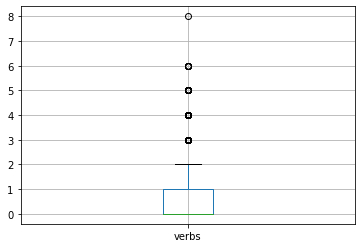

In [30]:
formal_data.boxplot(column='verbs')

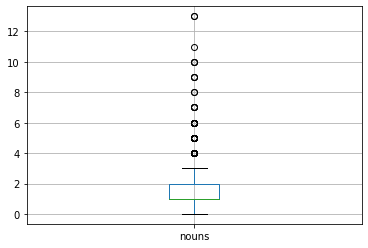

In [31]:
data.boxplot(column='nouns')

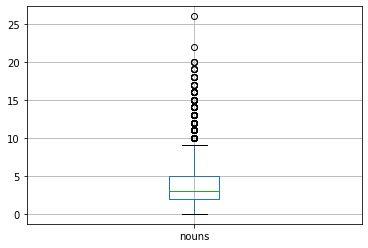

In [32]:
formal_data.boxplot(column='nouns')

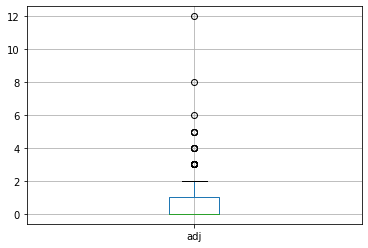

In [33]:
data.boxplot(column='adj')

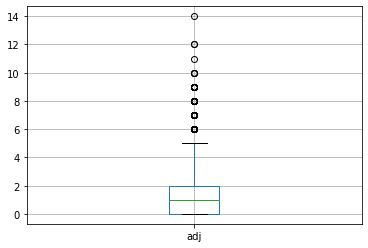

In [34]:
formal_data.boxplot(column='adj')

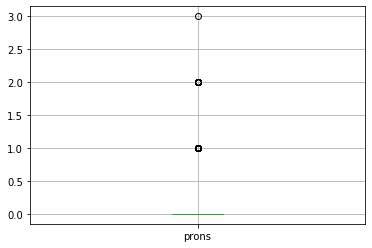

In [35]:
data.boxplot(column='prons')

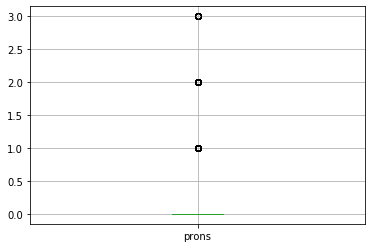

In [36]:
formal_data.boxplot(column='prons')

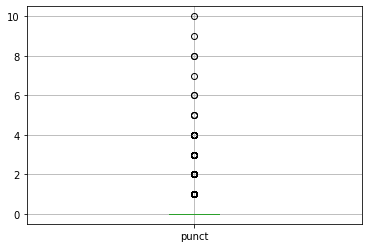

In [37]:
data.boxplot(column='punct')

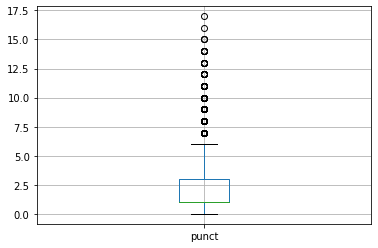

In [38]:
formal_data.boxplot(column='punct')

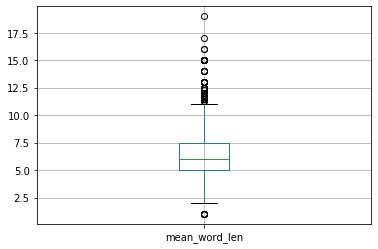

In [39]:
data.boxplot(column='mean_word_len')

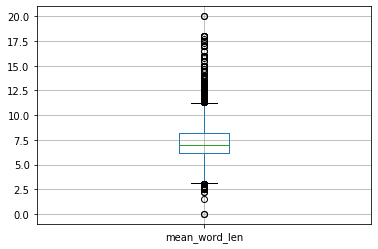

In [40]:
formal_data.boxplot(column='mean_word_len')

## The most frequent n-grams

In [41]:
from nltk.util import ngrams

def print_list_most_freq_ngram(data, n=2, topn=20):
    freq_ngrams = {}

    for text in data['defs']:
        text = ''.join(x for x in text if x not in punctuation)
        words = word_tokenize(text, language="russian")
        words = [word for word in words if word not in stops]
        text = ' '.join(words)
        words = [word.lemma_ for word in nlp(text)]
    
        curr_ngrams = list(ngrams(words, n))
        for ngram in curr_ngrams:
            if ngram in freq_ngrams:
                freq_ngrams[ngram] += 1
            else:
                freq_ngrams[ngram] = 1

    sorted_tuples = sorted(freq_ngrams.items(), key=lambda item: -item[1])

    for i in range(topn):
        ngram = sorted_tuples[i][0]
        freq = sorted_tuples[i][1]
        print(ngram, freq)

## The most frequent structures

In [42]:
def print_list_most_freq_patterns(data, n=2, topn=20):
    freq_ngrams = {}

    for text in data['defs']:
        text = ''.join(x for x in text if x not in punctuation)
        words = word_tokenize(text, language="russian")
        words = [word for word in words if word not in stops]
        text = ' '.join(words)
        pos_tags = [word.pos_ for word in nlp(text)]
    
        curr_ngrams = list(ngrams(pos_tags, n))
        for ngram in curr_ngrams:
            if ngram in freq_ngrams:
                freq_ngrams[ngram] += 1
            else:
                freq_ngrams[ngram] = 1

    sorted_tuples = sorted(freq_ngrams.items(), key=lambda item: -item[1])

    for i in range(topn):
        ngram = sorted_tuples[i][0]
        freq = sorted_tuples[i][1]
        print(ngram, freq)

In [43]:
print("Human_data\n")
for i in range(2, 6):
    print("n =", i)
    print("\n")
    print("Most frequent ngrams:")
    print_list_most_freq_ngram(data, n=i, topn=10)
    print("\n")
    print("Most frequent structures by POS:")
    print_list_most_freq_patterns(data, n=i, topn=10)
    print("\n")

Human_data

n = 2


Most frequent ngrams:
('человек', 'который') 13
('антоним', 'слово') 12
('музыкальный', 'инструмент') 11
('животное', 'которое') 10
('часть', 'тело') 10
('синоним', 'слово') 9
('домашний', 'животное') 9
('средство', 'передвижение') 5
('время', 'год') 5
('алкогольный', 'напиток') 5


Most frequent structures by POS:
('NOUN', 'NOUN') 1367
('ADJ', 'NOUN') 906
('VERB', 'NOUN') 603
('NOUN', 'VERB') 322
('NOUN', 'ADJ') 265
('PRON', 'VERB') 163
('ADJ', 'ADJ') 162
('NOUN', 'PRON') 141
('VERB', 'ADJ') 88
('PRON', 'NOUN') 60


n = 3


Most frequent ngrams:
('антоним', 'слово', 'девочка') 4
('это', 'птица', 'которая') 3
('часть', 'человеческий', 'тело') 3
('домашний', 'животное', 'которое') 3
('этот', 'действие', 'войне') 2
('часть', 'тело', 'человек') 2
('вода', 'которая', 'литься') 2
('очень', 'умный', 'человек') 2
('животное', 'которое', 'мяукать') 2
('ребёнок', 'мужской', 'род') 2


Most frequent structures by POS:
('NOUN', 'NOUN', 'NOUN') 318
('ADJ', 'NOUN', 'NOUN') 189
(

In [44]:
print("Formal_data\n")
print("n =", 2)
print("\n")
print("Most frequent ngrams:")
print_list_most_freq_ngram(formal_data, n=2, topn=10)
print("\n")
print("Most frequent structures by POS:")
print_list_most_freq_patterns(formal_data, n=2, topn=10)
print("\n")

Formal_data

n = 2


Most frequent ngrams:
('т', 'п') 1093
('такой', 'действие') 358
('результат', 'такой') 346
('коголибо', 'чеголибо') 127
('житель', 'уроженец') 98
('растение', 'семейство') 94
('музыкальный', 'инструмент') 82
('учебный', 'заведение') 77
('транспортный', 'средство') 76
('специалист', 'область') 72


Most frequent structures by POS:
('NOUN', 'NOUN') 43178
('ADJ', 'NOUN') 26397
('NOUN', 'ADJ') 14614
('NOUN', 'VERB') 9993
('VERB', 'NOUN') 9376
('ADJ', 'ADJ') 6661
('VERB', 'ADJ') 3286
('NOUN', 'ADV') 2272
('DET', 'NOUN') 2053
('VERB', 'VERB') 1764


